<a href="https://colab.research.google.com/github/chominyeong/NewsSentimentStock_StockSurge/blob/main/analysis/%EA%B0%80%EC%84%A4%EA%B2%80%EC%A6%9D3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 설치 후 런타임 다시 시작, 다시 시작할 때는 실행 안해도 됨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [ ]:
# 나눔 바른 고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

데이터 불러오기

In [ ]:
stock_news_df = pd.read_csv("/content/drive/MyDrive/성동3기 전Z전능 데이터분석가 과정/python 프로젝트 떡상/가설 검증/stock_news_df.csv")

전처리

In [ ]:
# 날짜 format 변경
stock_news_df['date'] = pd.to_datetime(stock_news_df['date'])

# 반올림
stock_news_df['종가'] = round(stock_news_df['종가'], 2)
stock_news_df['시가'] = round(stock_news_df['시가'], 2)
stock_news_df['고가'] = round(stock_news_df['고가'], 2)
stock_news_df['저가'] = round(stock_news_df['저가'], 2)

stock_news_df['keyword'].replace(['전기차', 'ev', 'electric vehicle'], '전기 자동차', inplace=True)
stock_news_df['keyword'].replace('Elon Musk', '일론 머스크', inplace=True)
stock_news_df['keyword'].replace('Tesla', '테슬라', inplace=True)
stock_news_df['keyword'].replace(['LG 엔솔', 'lg energy solution', 'LG 에너지솔루션'], 'LG 에너지 솔루션', inplace=True)
stock_news_df['keyword'].replace(['panasonic battery', '파나소닉 배터리'], '파나소닉', inplace=True)
stock_news_df['keyword'].replace('Lithium', '리튬', inplace=True)

<ipython-input-4-5331887308c0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_news_df['keyword'].replace(['전기차', 'ev', 'electric vehicle'], '전기 자동차', inplace=True)


### LG 에너지 솔루션

In [ ]:
lg_stock = stock_news_df.query('기업명 == "LG 에너지 솔루션"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)

In [ ]:
lg_stock.head()

,기업명,date,종가,변동 %,거래량
0,LG 에너지 솔루션,2024-07-01,250.99,6.28,304450.0
1,LG 에너지 솔루션,2024-07-02,247.83,-1.01,350150.0
2,LG 에너지 솔루션,2024-07-03,258.15,4.22,711950.0
3,LG 에너지 솔루션,2024-07-04,260.10,0.28,224990.0
4,LG 에너지 솔루션,2024-07-05,259.70,-0.42,206520.0


1. 저항선과 지지선   
> 저항선 : 주식 가격이 상승하던 추세에서 상승을 멈추고 **하락하기 시작**하는 가격 수준   
> 지지선 : 주식 가격이 하락하던 추세에서 하락을 멈추고 **상승하기 시작**하는 가격 수준

In [ ]:
prices = lg_stock['종가']

In [ ]:
prices.mean()

276.55083333333334

In [ ]:
np.std(prices) * 1.5

36.868029981102865

In [ ]:
np.mean(prices) * 0.05

13.827541666666669

In [ ]:
(np.std(prices) * 1.5 + np.mean(prices) * 0.05)/2

25.347785823884767

In [ ]:
maxv, maxv_prop = find_peaks(prices, prominence=24) # 국소 최대값
minv, minv_prop = find_peaks(-prices, prominence=24) # 국소 최소값

In [ ]:
print(maxv)
print(minv)

[ 8 44 65 83 89 98]
[17 50 74 85 92]


In [ ]:
# 국소 최대값 및 최소값에 해당하는 가격을 데이터프레임으로 생성
resistance_prices = prices[maxv]
support_prices = prices[minv]

lg_lines_df = pd.DataFrame({
    'Type': ['저항구간']*len(resistance_prices) + ['지지구간']*len(support_prices),
    'Price': np.concatenate([resistance_prices, support_prices]),
    'Date': np.concatenate([lg_stock['date'].values[maxv], lg_stock['date'].values[minv]])
}).sort_values(by='Date').reset_index(drop=True)

In [ ]:
lg_stock.head(1)

,기업명,date,종가,변동 %,거래량
0,LG 에너지 솔루션,2024-07-01,250.99,6.28,304450.0


In [ ]:
lg_lines_df.loc[-1] = ['지지구간', 250.99, '2024-07-01']

In [ ]:
lg_lines_df = lg_lines_df.sort_index().reset_index(drop=True)

In [ ]:
lg_lines_df['Date'] = pd.to_datetime(lg_lines_df['Date'])
lg_lines_df

,Type,Price,Date
0,지지구간,250.99,2024-07-01
1,저항구간,273.53,2024-07-11
2,지지구간,232.61,2024-07-24
3,저항구간,308.04,2024-09-02
4,지지구간,282.53,2024-09-10
5,저항구간,325.92,2024-10-08
6,지지구간,276.80,2024-10-22
7,저항구간,310.36,2024-11-04
8,지지구간,278.86,2024-11-06
9,저항구간,303.74,2024-11-12


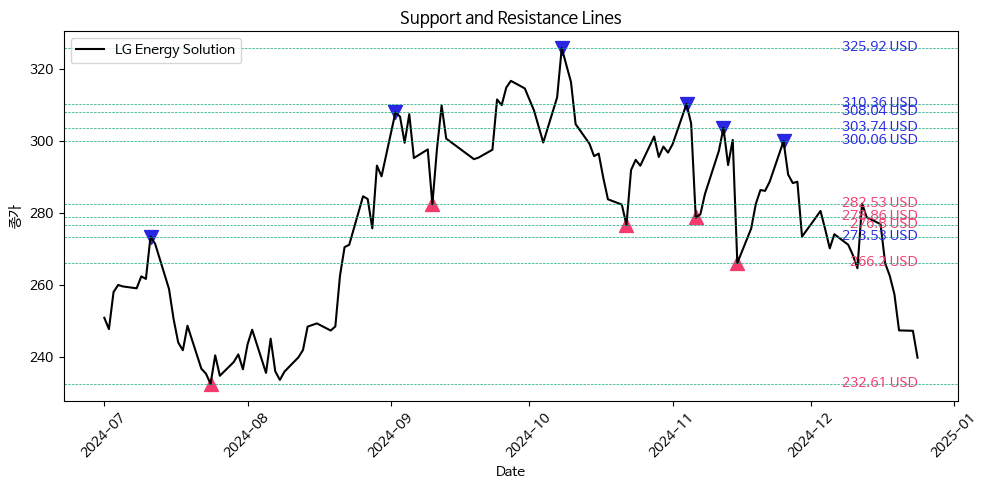

In [ ]:
# 차트 생성
plt.figure(figsize=(10, 5))

# 종가선 차트
plt.plot(lg_stock['date'], lg_stock['종가'], label='LG Energy Solution', color='black')


# 저항선 및 지지선 표시 및 가격대 표시
for idx in maxv:
    plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#2825e3', marker='v', s=100)
    plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#2825e3')

for idx in minv:
    plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#f33b6e', marker='^', s=100)
    plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#f33b6e')

plt.title("Support and Resistance Lines")
plt.xlabel('Date')
plt.ylabel('종가')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

수평선 생성

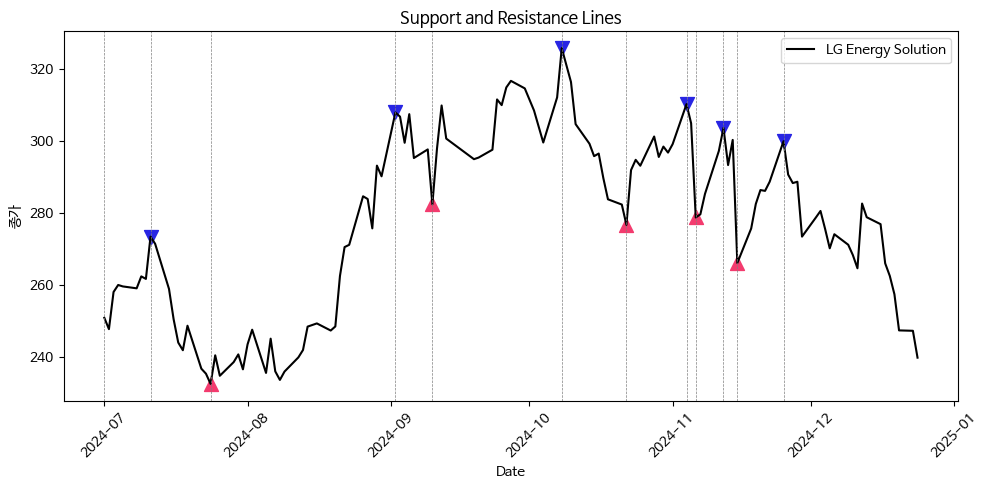

In [ ]:
# 차트 생성
plt.figure(figsize=(10, 5))

# 종가선 차트
plt.plot(lg_stock['date'], lg_stock['종가'], label='LG Energy Solution', color='black')


# 저항선 및 지지선 표시 및 가격대 표시
for idx in maxv:
    # plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#2825e3', marker='v', s=100)
    # plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#2825e3')

for idx in minv:
    # plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#f33b6e', marker='^', s=100)
    # plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#f33b6e')


# 수평선 생성
for index, row in lg_lines_df.iterrows():
    plt.axvline(x = row['Date'], color = 'grey', linestyle='--', linewidth=0.5)


plt.title("Support and Resistance Lines")
plt.xlabel('Date')
plt.ylabel('종가')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2. 해당 구간의 감성 비율

In [ ]:
stock_news_df.keyword.unique()

array(['2차전지', '전기 자동차', 'LG 에너지 솔루션', '일론 머스크', 'BYD', '리튬', '파나소닉',
       'CATL', '테슬라'], dtype=object)

In [ ]:
# 1. 뉴스 데이터만 추출
news_df = stock_news_df[['keyword', 'summary','date', '감성점수', '감성결과']].drop_duplicates(keep='first', ignore_index = True)

# 2. LG 에너지 솔루션과 관련된 뉴스만 추출
## keyword : '2차전지', '전기 자동차', '리튬', 'LG 에너지 솔루션'
lg_news = news_df.query('keyword in ["LG 에너지 솔루션"]')

In [ ]:
# 3. 구간별 이름 부여
lg_news = lg_news.sort_values('date').reset_index(drop=True)
lg_lines_df = lg_lines_df.sort_values('Date').reset_index(drop=True)

group_idx = np.searchsorted(lg_lines_df['Date'], lg_news['date'], side='right')  # df1의 날짜가 df2에서 몇 번째 구간에 속하는지 찾음

lg_news['group'] = [i for i in group_idx]

In [ ]:
lg_news

,keyword,summary,date,감성점수,감성결과,group
0,LG 에너지 솔루션,"ON JULY 1, Hyundai Motor Announced that would ...",2024-07-01,0.79,Positive,1
1,LG 에너지 솔루션,"350 SBHC 20,750 0 TaihanelecWire 15,980 DN 580...",2024-07-01,0.71,Positive,1
2,LG 에너지 솔루션,"42 PERCENT.Hyundai Motor Dropped 0.68 Percent,...",2024-07-01,0.95,Positive,1
3,LG 에너지 솔루션,15 percent.Leading Battery Maker LG ENERGY Sol...,2024-07-01,0.91,Positive,1
4,LG 에너지 솔루션,Photo: LG Energy Solution LG Energy Solution h...,2024-07-02,0.97,Positive,1
...,...,...,...,...,...,...
2675,LG 에너지 솔루션,According to the investment bank (IB) industry...,2024-12-24,0.97,Positive,12
2676,LG 에너지 솔루션,Testing is currently underway at LG Energy Sol...,2024-12-24,0.72,Positive,12
2677,LG 에너지 솔루션,"Among the top market caps (market cap), SK Hyn...",2024-12-24,0.49,Positive,12
2678,LG 에너지 솔루션,"Then, LG Chem's material split LG Ensol will b...",2024-12-24,0.03,Neutral,12


In [ ]:
## 그룹 0 : 지지구간 (2024-07-01 ~ 2024-07-10)
## 그룹 1 : 저항구간 (2024-07-11 ~ 2024-07-23)
## 그룹 2 : 지지구간 (2024-07-24 ~ 2024-09-01)
## ...
## 그룹 10 : 지지구간 (2024-11-15 ~ 2024-11-24)
## 그룹 11 : 저항구간 (2024-11-25 ~ 2024-12-24)

In [ ]:
# 그룹별 빈도
lg_group_sent_cnt = lg_news.groupby(['group', '감성결과'])['감성결과'].value_counts()
lg_group_sent_cnt

group  감성결과    
1      Negative     12
       Neutral       5
       Positive    250
2      Negative     27
       Neutral       7
       Positive    207
3      Negative     36
       Neutral      28
       Positive    468
4      Negative      4
       Neutral       1
       Positive     86
5      Negative     12
       Neutral      11
       Positive    296
6      Negative      7
       Neutral       9
       Positive    174
7      Negative     17
       Neutral       4
       Positive    259
8      Negative      1
       Positive     11
9      Positive     76
10     Negative      2
       Neutral       2
       Positive     41
11     Negative     12
       Neutral       5
       Positive    176
12     Negative     27
       Neutral       8
       Positive    399
Name: count, dtype: int64

In [ ]:
# 그룹별 감성점수 평균
lg_news.groupby(['group', '감성결과'])['감성점수'].mean()

group  감성결과    
1      Negative   -0.235000
       Neutral     0.000000
       Positive    0.790840
2      Negative   -0.393333
       Neutral     0.000000
       Positive    0.718213
3      Negative   -0.455000
       Neutral    -0.003214
       Positive    0.766282
4      Negative   -0.407500
       Neutral     0.030000
       Positive    0.745349
5      Negative   -0.298333
       Neutral     0.004545
       Positive    0.801250
6      Negative   -0.445714
       Neutral     0.005556
       Positive    0.767644
7      Negative   -0.353529
       Neutral     0.000000
       Positive    0.777259
8      Negative   -0.330000
       Positive    0.775455
9      Positive    0.762500
10     Negative   -0.570000
       Neutral     0.000000
       Positive    0.781951
11     Negative   -0.330833
       Neutral     0.008000
       Positive    0.765625
12     Negative   -0.385556
       Neutral     0.000000
       Positive    0.765789
Name: 감성점수, dtype: float64

In [ ]:
# 그룹별 비율
lg_group_sent_cnt = lg_group_sent_cnt.reset_index(name = 'count')


total_by_sent = lg_group_sent_cnt.groupby('감성결과')['count'].sum()

lg_group_sent_rto = lg_group_sent_cnt.copy()

lg_group_sent_rto['ratio'] = lg_group_sent_cnt.apply(
    lambda row: row['count'] / total_by_sent[row['감성결과']],
    axis=1
)

lg_group_sent_rto

,group,감성결과,count,ratio
0,1,Negative,12,0.076433
1,1,Neutral,5,0.062500
2,1,Positive,250,0.102333
3,2,Negative,27,0.171975
4,2,Neutral,7,0.087500
5,2,Positive,207,0.084732
6,3,Negative,36,0.229299
7,3,Neutral,28,0.350000
8,3,Positive,468,0.191568
9,4,Negative,4,0.025478


In [ ]:
print(lg_group_sent_rto.query('감성결과 == "Positive"')['ratio'].sum())
print(lg_group_sent_rto.query('감성결과 == "Negative"')['ratio'].sum())
print(lg_group_sent_rto.query('감성결과 == "Neutral"')['ratio'].sum())

1.0
1.0
0.9999999999999999


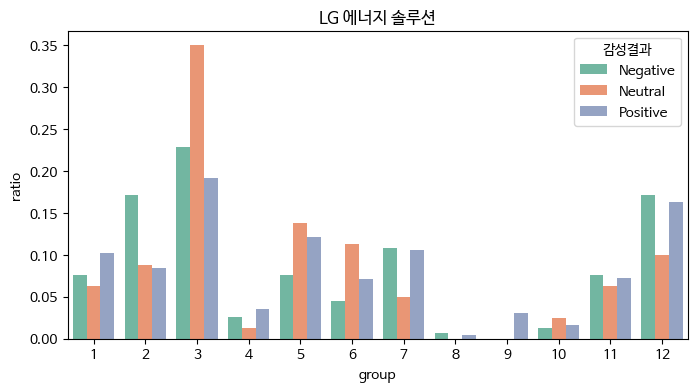

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data = lg_group_sent_rto, x = 'group', y = 'ratio', hue = '감성결과', palette = 'Set2')
plt.title('LG 에너지 솔루션')
plt.show()

In [ ]:
lg_group_sent_rto.groupby('group')['ratio'].max()

,ratio
group,
1,0.102333
2,0.171975
3,0.350000
4,0.035203
5,0.137500
6,0.112500
7,0.108280
8,0.006369
9,0.031109


In [ ]:
# 1. 그룹별로 최대 ratio를 가진 행을 찾기
idx_max_ratio = lg_group_sent_rto.groupby('group')['ratio'].idxmax()

# 2. 해당 인덱스를 기준으로 감성결과 추출
lg_group_sent_maxrto = lg_group_sent_rto.loc[idx_max_ratio, ['group', '감성결과', 'ratio']].reset_index(drop=True)
lg_group_sent_maxrto.set_index('group')

,감성결과,ratio
group,,
1,Positive,0.102333
2,Negative,0.171975
3,Neutral,0.350000
4,Positive,0.035203
5,Neutral,0.137500
6,Neutral,0.112500
7,Negative,0.108280
8,Negative,0.006369
9,Positive,0.031109


In [ ]:
lg_group_sent_rto

,group,감성결과,count,ratio
0,1,Negative,12,0.076433
1,1,Neutral,5,0.062500
2,1,Positive,250,0.102333
3,2,Negative,27,0.171975
4,2,Neutral,7,0.087500
5,2,Positive,207,0.084732
6,3,Negative,36,0.229299
7,3,Neutral,28,0.350000
8,3,Positive,468,0.191568
9,4,Negative,4,0.025478


In [ ]:
lg_merge = pd.merge(lg_group_sent_maxrto, lg_lines_df, left_index=True, right_index=True, how='left')
lg_merge = lg_merge[['group', 'Type', 'Date', '감성결과']]
lg_merge

,group,Type,Date,감성결과
0,1,지지구간,2024-07-01,Positive
1,2,저항구간,2024-07-11,Negative
2,3,지지구간,2024-07-24,Neutral
3,4,저항구간,2024-09-02,Positive
4,5,지지구간,2024-09-10,Neutral
5,6,저항구간,2024-10-08,Neutral
6,7,지지구간,2024-10-22,Negative
7,8,저항구간,2024-11-04,Negative
8,9,지지구간,2024-11-06,Positive
9,10,저항구간,2024-11-12,Neutral


In [ ]:
lg_merge.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    3
      Neutral     2
      Positive    1
지지구간  Negative    2
      Neutral     2
      Positive    2
Name: count, dtype: int64

In [ ]:
# Type으로 그룹화 후 감성결과별 개수 세기
result = lg_merge.groupby('Type')['감성결과'].value_counts().reset_index(name='count')

# 각 Type 그룹 내에서 count 기준으로 내림차순 정렬
result_sorted = result.sort_values(by=['Type','count'], ascending=True).reset_index(drop=True)

In [ ]:
result_sorted

,Type,감성결과,count
0,저항구간,Positive,1
1,저항구간,Neutral,2
2,저항구간,Negative,3
3,지지구간,Negative,2
4,지지구간,Neutral,2
5,지지구간,Positive,2


In [ ]:
lg_merge['Next_Date'] = lg_merge['Date'].shift(-1)  # 다음 행의 날짜
lg_merge = lg_merge.fillna(pd.to_datetime('2024-12-25'))
lg_merge['Middle_Date'] = lg_merge[['Date', 'Next_Date']].mean(axis=1)

In [ ]:
lg_merge

,group,Type,Date,감성결과,Next_Date,Middle_Date
0,1,지지구간,2024-07-01,Positive,2024-07-11,2024-07-06 00:00:00
1,2,저항구간,2024-07-11,Negative,2024-07-24,2024-07-17 12:00:00
2,3,지지구간,2024-07-24,Neutral,2024-09-02,2024-08-13 00:00:00
3,4,저항구간,2024-09-02,Positive,2024-09-10,2024-09-06 00:00:00
4,5,지지구간,2024-09-10,Neutral,2024-10-08,2024-09-24 00:00:00
5,6,저항구간,2024-10-08,Neutral,2024-10-22,2024-10-15 00:00:00
6,7,지지구간,2024-10-22,Negative,2024-11-04,2024-10-28 12:00:00
7,8,저항구간,2024-11-04,Negative,2024-11-06,2024-11-05 00:00:00
8,9,지지구간,2024-11-06,Positive,2024-11-12,2024-11-09 00:00:00
9,10,저항구간,2024-11-12,Neutral,2024-11-15,2024-11-13 12:00:00


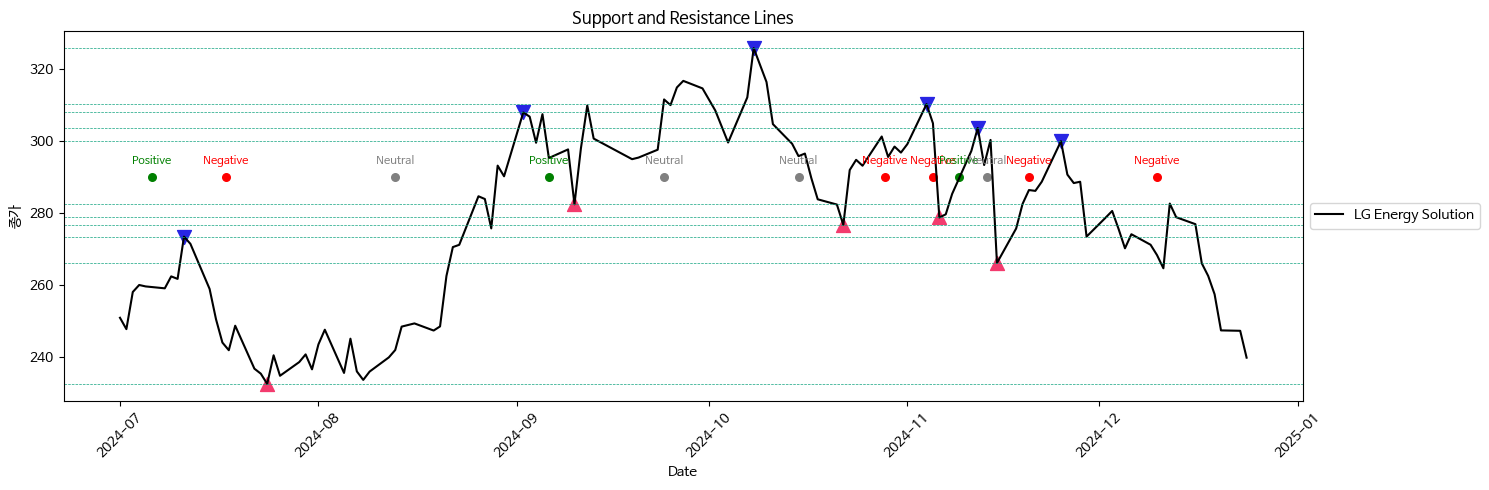

In [ ]:
# 차트 생성
plt.figure(figsize=(15, 5))

# 종가선 차트
plt.plot(lg_stock['date'], lg_stock['종가'], label='LG Energy Solution', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 저항선 및 지지선 표시 및 가격대 표시
for idx in maxv:
    plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#2825e3', marker='v', s=100)
    # plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#2825e3')

for idx in minv:
    plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
    plt.scatter(lg_stock['date'].iloc[idx], prices[idx], color='#f33b6e', marker='^', s=100)
    # plt.text(lg_stock['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#f33b6e')

# 감성결과를 그래프에 추가
for i, row in lg_merge.iterrows():
    color_map = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
    plt.scatter(row['Middle_Date'], 290, color=color_map[row['감성결과']], label=f"{row['감성결과']} {row['Type']}", s=30, alpha=1)
    plt.text(row['Middle_Date'], 293, f"{row['감성결과']}", color=color_map[row['감성결과']], ha='center', va='bottom', fontsize=8)


plt.title("Support and Resistance Lines")
plt.xlabel('Date')
plt.ylabel('종가')

plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

하나의 함수로

In [ ]:
def senti_stock(stock, news, promi):
    # 뉴스 데이터 복사
    news_df = news.copy()
    stock_df = stock.copy()

    기업명 = stock['기업명'].unique()[0]

    # 1. 저항구간과 지지구간 생성
    prices = stock_df['종가']
    maxv, _ = find_peaks(prices, prominence=promi)
    minv, _ = find_peaks(-prices, prominence=promi)

    resistance_prices = prices[maxv]
    support_prices = prices[minv]

    lines_df = pd.DataFrame({
        'Type': ['저항구간'] * len(resistance_prices) + ['지지구간'] * len(support_prices),
        'Price': np.concatenate([resistance_prices, support_prices]),
        'Date': np.concatenate([stock_df['date'].values[maxv], stock_df['date'].values[minv]])
    }).sort_values(by='Date').reset_index(drop=True)

    lines_df.loc[-1] = ['지지구간', stock_df.loc[0, '종가'], '2024-07-01']
    lines_df = lines_df.sort_index().reset_index(drop=True)
    lines_df['Date'] = pd.to_datetime(lines_df['Date'])


    # 1-1. 저항선과 지지선, 종가 그래프 시각화
    # 종가 차트 생성
    plt.figure(figsize=(15, 5))
    plt.plot(stock_df['date'], stock_df['종가'], label=기업명, color='black')

    # 저항선 및 지지선 표시 및 가격대 표시
    for idx in maxv:
        plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
        plt.scatter(stock_df['date'].iloc[idx], prices[idx], color='#2825e3', marker='v', s=100)
        plt.text(stock_df['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#2825e3')

    for idx in minv:
        plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
        plt.scatter(stock_df['date'].iloc[idx], prices[idx], color='#f33b6e', marker='^', s=100)
        plt.text(stock_df['date'].max(), prices[idx], f"{prices[idx]} USD", verticalalignment='center', horizontalalignment='right', color='#f33b6e')

    plt.title("Support and Resistance Lines")
    plt.xlabel('Date')
    plt.ylabel('종가')
    plt.legend()
    plt.grid(False)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    # 2. 감성 분석 빈도 및 비율

    # 2-1. 뉴스 데이터와 저항/지지 데이터 날짜 정렬
    news_df = news_df.sort_values('date').reset_index(drop=True)
    lines_df = lines_df.sort_values('Date').reset_index(drop=True)

    # 2-2. 뉴스 데이터에 저항/지지 그룹 추가
    group_idx = np.searchsorted(lines_df['Date'], news_df['date'], side='right')
    news_df['group'] = [i for i in group_idx]

    # 2-3. 감성 분석 빈도 계산
    group_sent_cnt = news_df.groupby(['group', '감성결과'])['감성결과'].value_counts().reset_index(name='count')
    total_by_sent = group_sent_cnt.groupby('감성결과')['count'].sum()

    # 2-4. 감성 분석 비율 계산
    group_sent_rto = group_sent_cnt.copy()
    group_sent_rto['ratio'] = group_sent_cnt.apply(lambda row: row['count'] / total_by_sent[row['감성결과']], axis=1)

    # 2-5. 시각화
    plt.figure(figsize=(15, 4))
    sns.barplot(data = group_sent_rto, x = 'group', y = 'ratio', hue = '감성결과', palette = 'Set2')
    plt.title(기업명)
    plt.show()


    # 3. 최대 감성 비율을 가진 그룹 찾기
    idx_max_ratio = group_sent_rto.groupby('group')['ratio'].idxmax()
    group_sent_maxrto = group_sent_rto.loc[idx_max_ratio, ['group', '감성결과', 'ratio']].reset_index(drop=True)


    # 4. 감성결과와 지지/저항 합치기
    merge_df = pd.merge(group_sent_maxrto, lines_df, left_index=True, right_index=True, how='left')
    merge_df = merge_df[['group', 'Type', 'Date', '감성결과']]

    # 4-1. 시각화 (저항선/지지선 및 감성결과 포함)
    # 종가 차트 생성
    plt.figure(figsize=(15, 5))
    plt.plot(stock_df['date'], stock_df['종가'], label='Stock', color='black')

    # 저항, 지지선
    for idx in maxv:
        # plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
        plt.scatter(stock_df['date'].iloc[idx], prices[idx], color='#2825e3', marker='v', s=70)

    for idx in minv:
        # plt.axhline(y=prices[idx], color='#10a37f', linestyle='--', linewidth=0.5)
        plt.scatter(stock_df['date'].iloc[idx], prices[idx], color='#f33b6e', marker='^', s=70)

    # 수평선 생성
    for index, row in lines_df.iterrows():
        plt.axvline(x = row['Date'], color = 'grey', linestyle='--', linewidth=0.5)

    # 감성 표시
    merge_df['Next_Date'] = merge_df['Date'].shift(-1)
    merge_df = merge_df.fillna(pd.to_datetime('2024-12-25'))
    merge_df['Middle_Date'] = merge_df[['Date', 'Next_Date']].mean(axis=1)

    color_map = {'Positive': 'red', 'Neutral': 'grey', 'Negative': 'blue'}
    for _, row in merge_df.iterrows():
        plt.scatter(row['Middle_Date'], int(stock_df['종가'].median()), color=color_map[row['감성결과']], label=f"{row['감성결과']} {row['Type']}", s=30, alpha=1)
        plt.text(row['Middle_Date'], int(stock_df['종가'].median())+2, f"{row['감성결과']}", color=color_map[row['감성결과']], ha='center', va='bottom', fontsize=8)

    plt.title(f"{기업명}'s Support and Resistance Lines with Sentiment Analysis")
    plt.xlabel('Date')
    plt.ylabel('종가')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


    return lines_df, news_df, group_sent_cnt, group_sent_rto, group_sent_maxrto, merge_df

In [ ]:
stock_news_df.keyword.unique()

array(['2차전지', '전기 자동차', 'LG 에너지 솔루션', '일론 머스크', 'BYD', '리튬', '파나소닉',
       'CATL', '테슬라'], dtype=object)

In [ ]:
lg_stock = stock_news_df.query('기업명 == "LG 에너지 솔루션"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)
# 1. 뉴스 데이터만 추출
news = stock_news_df[['keyword', 'summary','date', '감성점수', '감성결과']].drop_duplicates(keep='first', ignore_index = True)

# 2. LG 에너지 솔루션과 관련된 뉴스만 추출
## keyword : '2차전지', '전기 자동차', '리튬', 'LG 에너지 솔루션'
lg_news = news.query('keyword in ["2차전지","BYD","LG 에너지 솔루션"]').reset_index(drop=True)

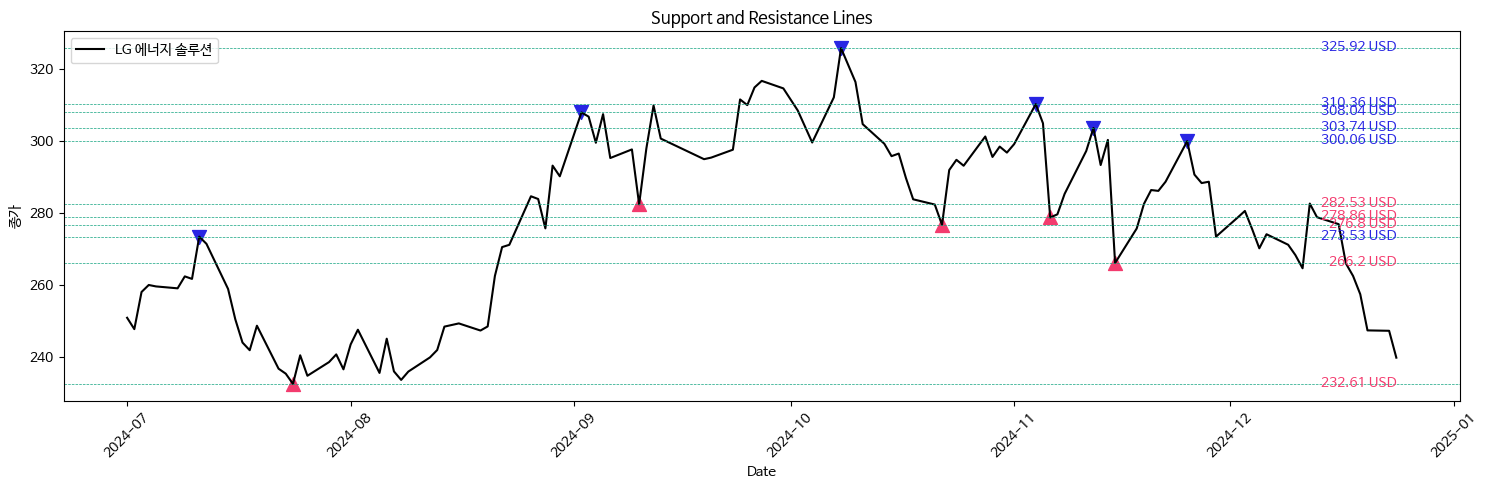

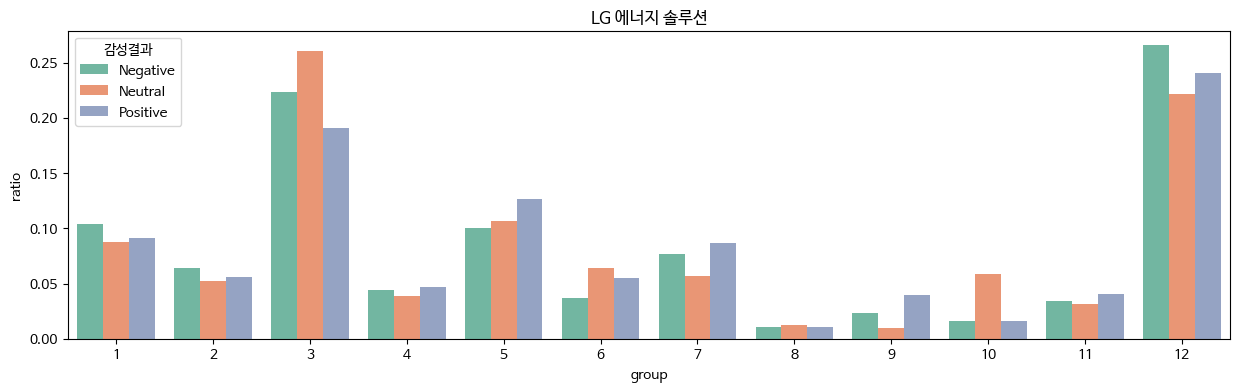

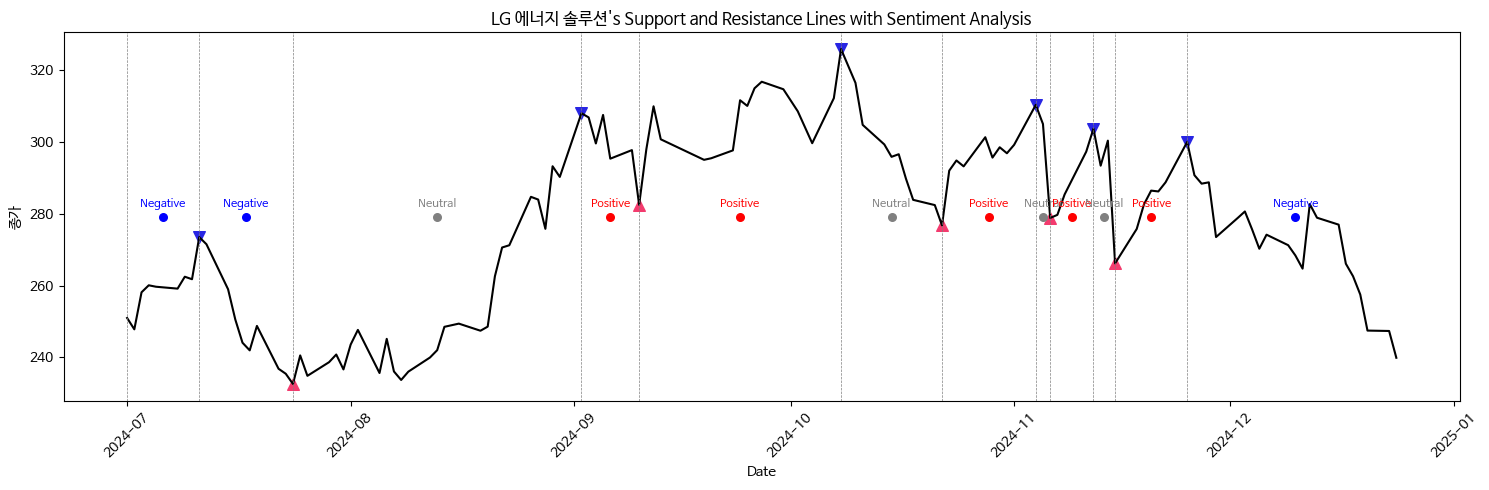

In [ ]:
a, b, c, d, e, f = senti_stock(lg_stock, lg_news, 24)

In [ ]:
a

,Type,Price,Date
0,지지구간,250.99,2024-07-01
1,저항구간,273.53,2024-07-11
2,지지구간,232.61,2024-07-24
3,저항구간,308.04,2024-09-02
4,지지구간,282.53,2024-09-10
5,저항구간,325.92,2024-10-08
6,지지구간,276.80,2024-10-22
7,저항구간,310.36,2024-11-04
8,지지구간,278.86,2024-11-06
9,저항구간,303.74,2024-11-12


In [ ]:
b

,keyword,summary,date,감성점수,감성결과,group
0,2차전지,In Rankify's stock rechargeable battery secto...,2024-07-01,0.00,Neutral,1
1,2차전지,"Founded in 2017, CTNS is a customized seconda...",2024-07-01,0.49,Positive,1
2,2차전지,"Primary batteries used in military radios, me...",2024-07-01,-0.66,Negative,1
3,2차전지,The 'Hwaseong Aricell Factory Fire Accident C...,2024-07-01,-0.91,Negative,1
4,2차전지,"Lee Sang-heon, a researcher at Hi Investment ...",2024-07-01,0.13,Positive,1
...,...,...,...,...,...,...
11520,2차전지,This 1st and 2nd training camp and dispatch o...,2024-12-25,0.40,Positive,12
11521,2차전지,"In addition, while in the past it was mainly ...",2024-12-25,-0.48,Negative,12
11522,BYD,By combining Honda's hybrid technology and st...,2024-12-25,0.68,Positive,12
11523,2차전지,"Chokwang Paint, Korea's 5th largest paint com...",2024-12-25,0.94,Positive,12


In [ ]:
c

,group,감성결과,count
0,1,Negative,171
1,1,Neutral,63
2,1,Positive,839
3,2,Negative,106
4,2,Neutral,38
5,2,Positive,509
6,3,Negative,368
7,3,Neutral,188
8,3,Positive,1751
9,4,Negative,72


In [ ]:
d

,group,감성결과,count,ratio
0,1,Negative,171,0.103951
1,1,Neutral,63,0.087258
2,1,Positive,839,0.091614
3,2,Negative,106,0.064438
4,2,Neutral,38,0.052632
5,2,Positive,509,0.055580
6,3,Negative,368,0.223708
7,3,Neutral,188,0.260388
8,3,Positive,1751,0.191199
9,4,Negative,72,0.043769


In [ ]:
e.set_index('group')

,감성결과,ratio
group,,
1,Negative,0.103951
2,Negative,0.064438
3,Neutral,0.260388
4,Positive,0.046517
5,Positive,0.126447
6,Neutral,0.063712
7,Positive,0.086482
8,Neutral,0.012465
9,Positive,0.039201


In [ ]:
f.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    2
      Neutral     3
      Positive    1
지지구간  Negative    1
      Neutral     1
      Positive    4
Name: count, dtype: int64

### Tesla

In [ ]:
tesla_stock = stock_news_df.query('기업명 == "테슬라"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)
tesla_news = news.query('keyword in ["일론 머스크", "테슬라"]').reset_index(drop=True)

In [ ]:
tesla_stock.head()

,기업명,date,종가,변동 %,거래량
0,테슬라,2024-07-01,209.86,6.05,135690000.0
1,테슬라,2024-07-02,231.26,10.20,205050000.0
2,테슬라,2024-07-03,246.39,6.54,166560000.0
3,테슬라,2024-07-05,251.52,2.08,154500000.0
4,테슬라,2024-07-08,252.94,0.56,157220000.0


In [ ]:
tesla_news.head()

,keyword,summary,date,감성점수,감성결과
0,일론 머스크,ELON Musk Reiterated the importance of the meg...,2024-07-01,0.48,Positive
1,일론 머스크,The same is true of the same background that E...,2024-07-01,0.62,Positive
2,일론 머스크,Elon Musk bought an 8 -bit computer and broke ...,2024-07-01,0.05,Neutral
3,일론 머스크,Elon Musk's neural links are actively involved...,2024-07-01,0.61,Positive
4,일론 머스크,"Elon Musk Tesla CEO has been effective, and th...",2024-07-01,0.48,Positive


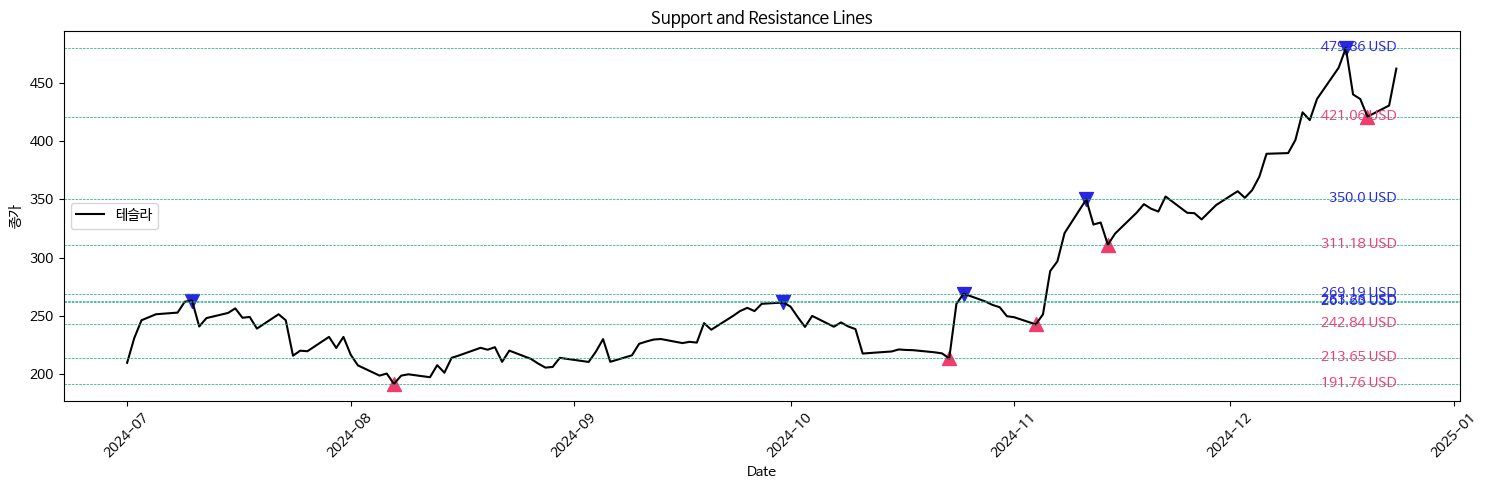

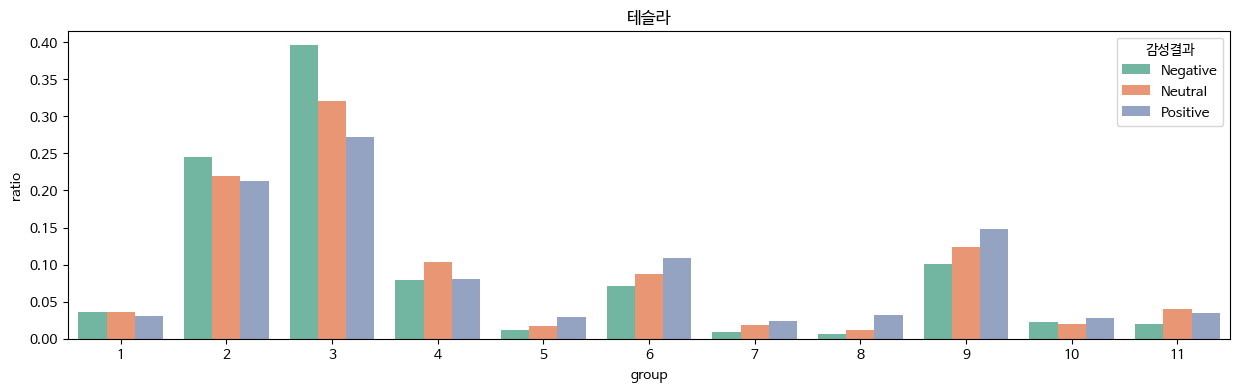

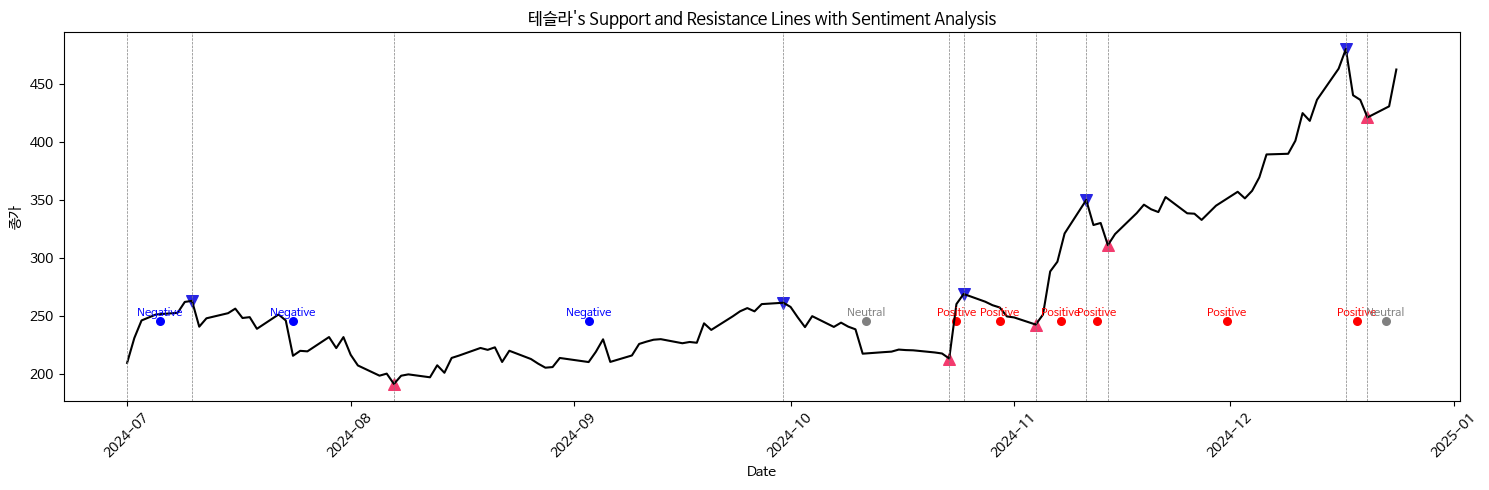

In [ ]:
a, b, c, d, e, f = senti_stock(tesla_stock, tesla_news,24)

In [ ]:
a

,Type,Price,Date
0,지지구간,209.86,2024-07-01
1,저항구간,263.26,2024-07-10
2,지지구간,191.76,2024-08-07
3,저항구간,261.63,2024-09-30
4,지지구간,213.65,2024-10-23
5,저항구간,269.19,2024-10-25
6,지지구간,242.84,2024-11-04
7,저항구간,350.00,2024-11-11
8,지지구간,311.18,2024-11-14
9,저항구간,479.86,2024-12-17


In [ ]:
b

,keyword,summary,date,감성점수,감성결과,group
0,일론 머스크,ELON Musk Reiterated the importance of the meg...,2024-07-01,0.48,Positive,1
1,일론 머스크,"It is equivalent to Falcon 9 (Falcon 9), the U...",2024-07-01,0.00,Neutral,1
2,일론 머스크,"In particular, Win is actively helping former ...",2024-07-01,0.91,Positive,1
3,일론 머스크,"Earlier this year, CEO Elon Musk moved the foc...",2024-07-01,0.08,Positive,1
4,일론 머스크,The character dot AI has almost all the charac...,2024-07-01,0.53,Positive,1
...,...,...,...,...,...,...
13897,테슬라,"The Ministry of Land, Infrastructure and Trans...",2024-12-25,0.46,Positive,11
13898,테슬라,Large stocks such as Tesla and Broadcom have r...,2024-12-25,0.84,Positive,11
13899,테슬라,"Tesla 7%, Broadcom 3%…Santa Claus Rally, a sea...",2024-12-25,0.40,Positive,11
13900,테슬라,Tesla's share price soared 7.4%.Tesla finished...,2024-12-25,0.73,Positive,11


In [ ]:
c

,group,감성결과,count
0,1,Negative,120
1,1,Neutral,57
2,1,Positive,275
3,2,Negative,806
4,2,Neutral,348
5,2,Positive,1917
6,3,Negative,1303
7,3,Neutral,507
8,3,Positive,2457
9,4,Negative,262


In [ ]:
d

,group,감성결과,count,ratio
0,1,Negative,120,0.036441
1,1,Neutral,57,0.036053
2,1,Positive,275,0.030461
3,2,Negative,806,0.244762
4,2,Neutral,348,0.220114
5,2,Positive,1917,0.212339
6,3,Negative,1303,0.395688
7,3,Neutral,507,0.320683
8,3,Positive,2457,0.272153
9,4,Negative,262,0.079563


In [ ]:
e

,group,감성결과,ratio
0,1,Negative,0.036441
1,2,Negative,0.244762
2,3,Negative,0.395688
3,4,Neutral,0.103732
4,5,Positive,0.029242
5,6,Positive,0.108773
6,7,Positive,0.024036
7,8,Positive,0.031901
8,9,Positive,0.148316
9,10,Positive,0.028245


In [ ]:
f.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    1
      Neutral     1
      Positive    3
지지구간  Negative    2
      Neutral     1
      Positive    3
Name: count, dtype: int64

### CATL

In [ ]:
stock_news_df.keyword.unique()

array(['2차전지', '전기 자동차', 'LG 에너지 솔루션', '일론 머스크', 'BYD', '리튬', '파나소닉',
       'CATL', '테슬라'], dtype=object)

In [ ]:
CATL_stock = stock_news_df.query('기업명 == "CATL"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)
CATL_news = news.query('keyword in ["LG 에너지 솔루션", "CATL"]').reset_index(drop=True)

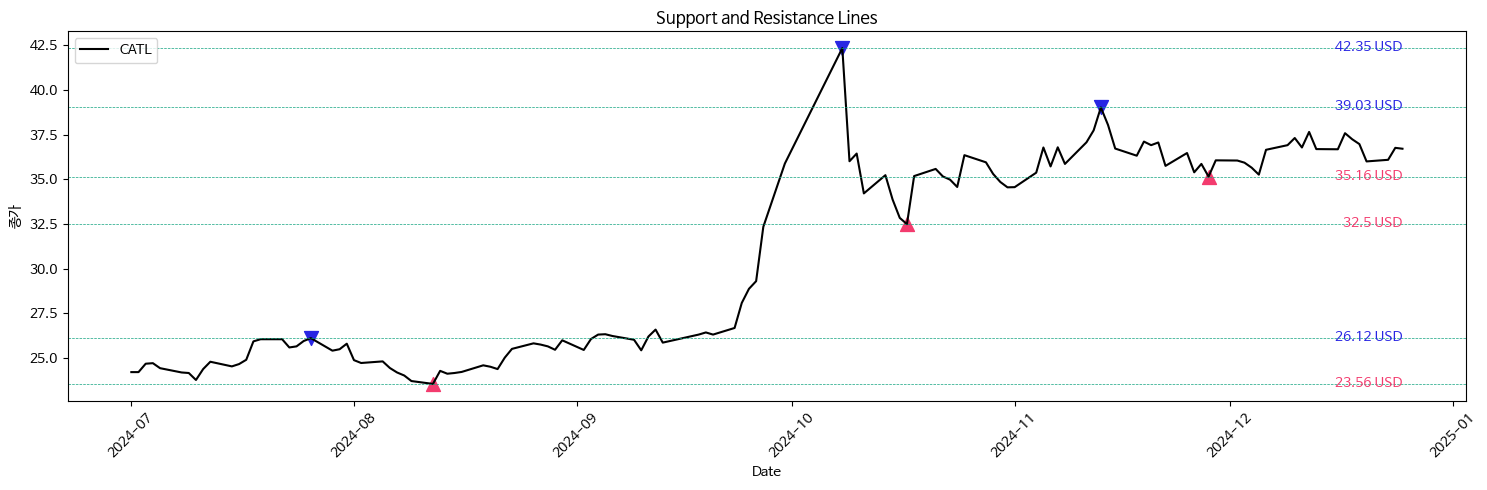

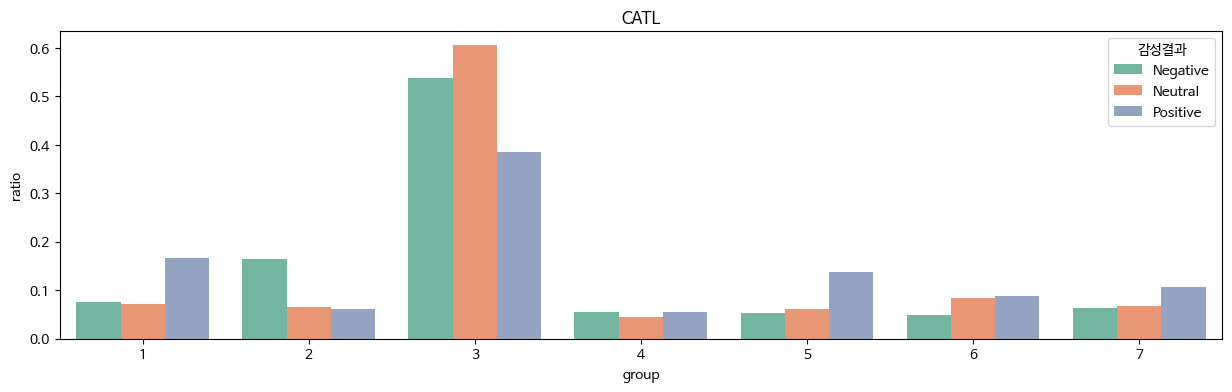

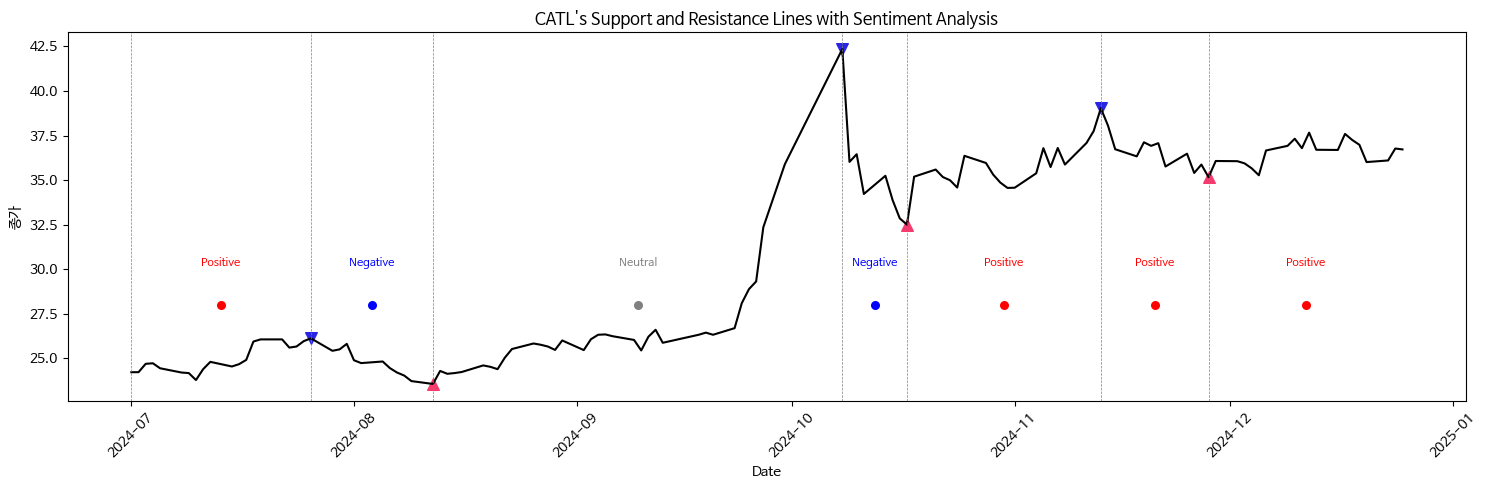

In [ ]:
a, b, c, d, e, f = senti_stock(CATL_stock, CATL_news,2)

In [ ]:
a

,Type,Price,Date
0,지지구간,24.22,2024-07-01
1,저항구간,26.12,2024-07-26
2,지지구간,23.56,2024-08-12
3,저항구간,42.35,2024-10-08
4,지지구간,32.50,2024-10-17
5,저항구간,39.03,2024-11-13
6,지지구간,35.16,2024-11-28


In [ ]:
b

,keyword,summary,date,감성점수,감성결과,group
0,LG 에너지 솔루션,"ON JULY 1, Hyundai Motor Announced that would ...",2024-07-01,0.79,Positive,1
1,LG 에너지 솔루션,"350 SBHC 20,750 0 TaihanelecWire 15,980 DN 580...",2024-07-01,0.71,Positive,1
2,LG 에너지 솔루션,"42 PERCENT.Hyundai Motor Dropped 0.68 Percent,...",2024-07-01,0.95,Positive,1
3,LG 에너지 솔루션,15 percent.Leading Battery Maker LG ENERGY Sol...,2024-07-01,0.91,Positive,1
4,CATL,"Zeng Yuqin, chairman of China's CATL, the wor...",2024-07-01,0.89,Positive,1
...,...,...,...,...,...,...
5143,LG 에너지 솔루션,According to the investment bank (IB) industry...,2024-12-24,0.97,Positive,7
5144,LG 에너지 솔루션,"Among the top market caps (market cap), SK Hyn...",2024-12-24,0.49,Positive,7
5145,LG 에너지 솔루션,LG ENERGY SOLUTION LTD.HAS JOINED HANDS with U...,2024-12-24,0.82,Positive,7
5146,LG 에너지 솔루션,"The plant utilization rate, which reached 70-8...",2024-12-24,-0.48,Negative,7


In [ ]:
c

,group,감성결과,count
0,1,Negative,64
1,1,Neutral,24
2,1,Positive,658
3,2,Negative,138
4,2,Neutral,22
5,2,Positive,247
6,3,Negative,453
7,3,Neutral,204
8,3,Positive,1528
9,4,Negative,47


In [ ]:
d

,group,감성결과,count,ratio
0,1,Negative,64,0.076010
1,1,Neutral,24,0.071217
2,1,Positive,658,0.165785
3,2,Negative,138,0.163895
4,2,Neutral,22,0.065282
5,2,Positive,247,0.062232
6,3,Negative,453,0.538005
7,3,Neutral,204,0.605341
8,3,Positive,1528,0.384984
9,4,Negative,47,0.055819


In [ ]:
e

,group,감성결과,ratio
0,1,Positive,0.165785
1,2,Negative,0.163895
2,3,Neutral,0.605341
3,4,Negative,0.055819
4,5,Positive,0.138574
5,6,Positive,0.087428
6,7,Positive,0.106576


In [ ]:
f.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    2
      Positive    1
지지구간  Neutral     1
      Positive    3
Name: count, dtype: int64

### BYD

In [ ]:
BYD_stock = stock_news_df.query('기업명 == "BYD"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)
BYD_news = news.query('keyword in ["BYD"]').reset_index(drop=True)

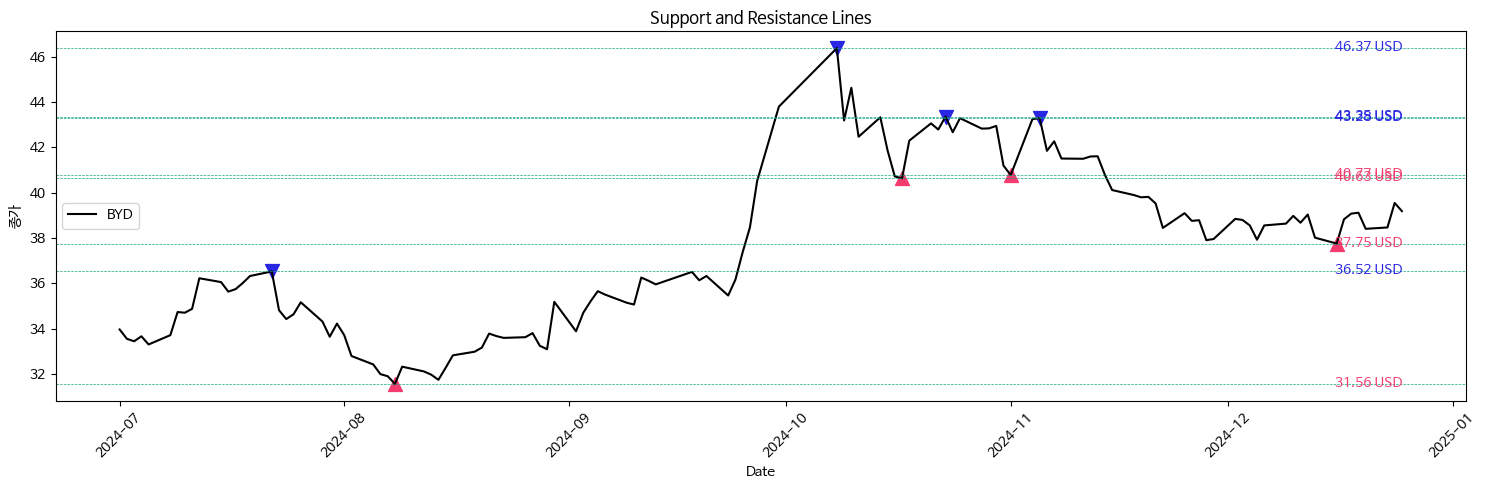

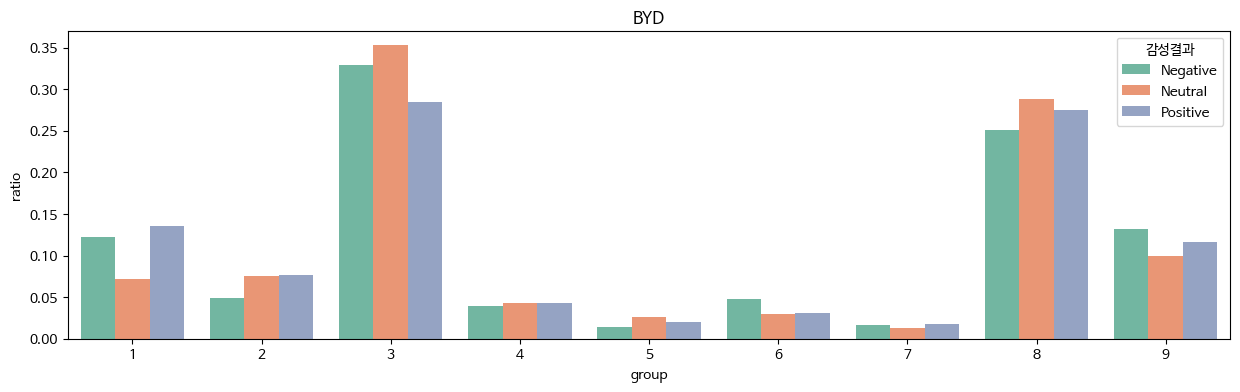

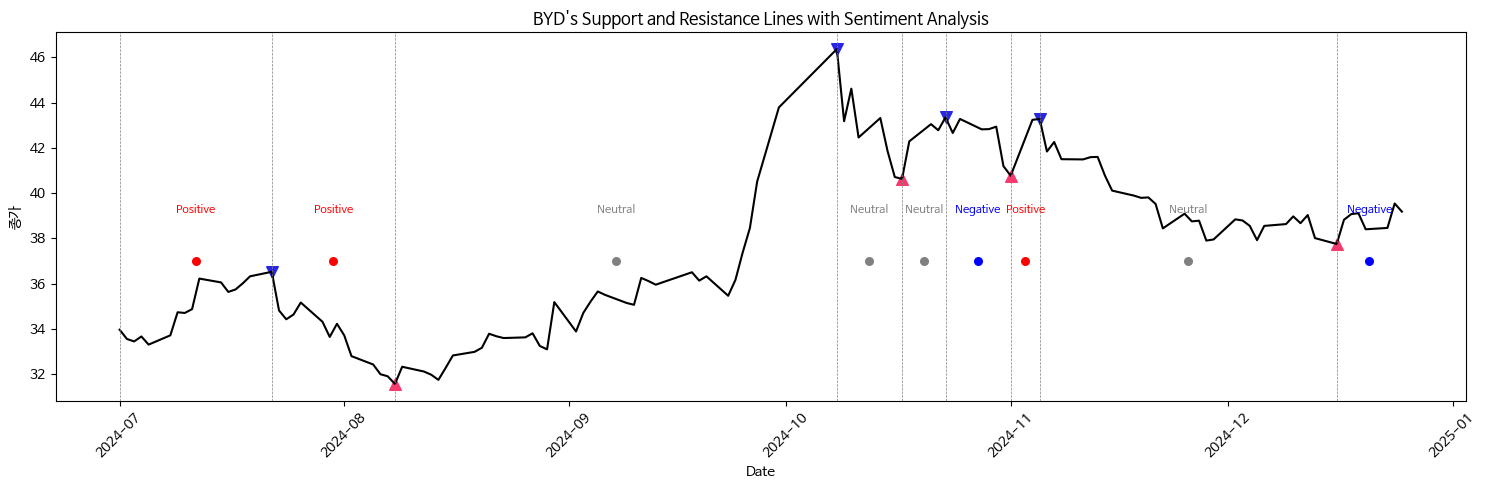

In [ ]:
a, b, c, d, e, f = senti_stock(BYD_stock, BYD_news,1.5)

In [ ]:
a

,Type,Price,Date
0,지지구간,33.96,2024-07-01
1,저항구간,36.52,2024-07-22
2,지지구간,31.56,2024-08-08
3,저항구간,46.37,2024-10-08
4,지지구간,40.63,2024-10-17
5,저항구간,43.35,2024-10-23
6,지지구간,40.77,2024-11-01
7,저항구간,43.28,2024-11-05
8,지지구간,37.75,2024-12-16


In [ ]:
b

,keyword,summary,date,감성점수,감성결과,group
0,BYD,According to market research firm SNE Researc...,2024-07-01,0.72,Positive,1
1,BYD,"Recently, Warren Buffett additionally liquidat...",2024-07-01,0.71,Positive,1
2,BYD,The explanation is that this is to narrow the...,2024-07-01,-0.49,Negative,1
3,BYD,The explanation is that this is to narrow the...,2024-07-01,-0.49,Negative,1
4,BYD,"Recently, due to these lithium-ion battery fir...",2024-07-01,0.15,Positive,1
...,...,...,...,...,...,...
4738,BYD,Honda and Nissan were late in preparing for t...,2024-12-25,-0.27,Negative,9
4739,BYD,Its position in the global market has long sin...,2024-12-25,-0.54,Negative,9
4740,BYD,By combining Honda's hybrid technology and st...,2024-12-25,0.68,Positive,9
4741,BYD,It was revealed that 163 Chinese workers were ...,2024-12-25,0.46,Positive,9


In [ ]:
c

,group,감성결과,count
0,1,Negative,116
1,1,Neutral,33
2,1,Positive,452
3,2,Negative,46
4,2,Neutral,35
5,2,Positive,256
6,3,Negative,312
7,3,Neutral,163
8,3,Positive,950
9,4,Negative,37


In [ ]:
d

,group,감성결과,count,ratio
0,1,Negative,116,0.122363
1,1,Neutral,33,0.071429
2,1,Positive,452,0.135614
3,2,Negative,46,0.048523
4,2,Neutral,35,0.075758
5,2,Positive,256,0.076808
6,3,Negative,312,0.329114
7,3,Neutral,163,0.352814
8,3,Positive,950,0.285029
9,4,Negative,37,0.039030


In [ ]:
e

,group,감성결과,ratio
0,1,Positive,0.135614
1,2,Positive,0.076808
2,3,Neutral,0.352814
3,4,Neutral,0.043290
4,5,Neutral,0.025974
5,6,Negative,0.047468
6,7,Positive,0.018302
7,8,Neutral,0.287879
8,9,Negative,0.131857


In [ ]:
f.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    1
      Neutral     2
      Positive    1
지지구간  Negative    1
      Neutral     2
      Positive    2
Name: count, dtype: int64

### panasonic

In [ ]:
stock_news_df.keyword.unique()

array(['2차전지', '전기 자동차', 'LG 에너지 솔루션', '일론 머스크', 'BYD', '리튬', '파나소닉',
       'CATL', '테슬라'], dtype=object)

In [ ]:
panasonic_stock = stock_news_df.query('기업명 == "파나소닉"')[['기업명', 'date', '종가', '변동 %', '거래량']].drop_duplicates().reset_index(drop=True)
panasonic_news = news.query('keyword in ["2차전지","파나소닉"]').reset_index(drop=True)

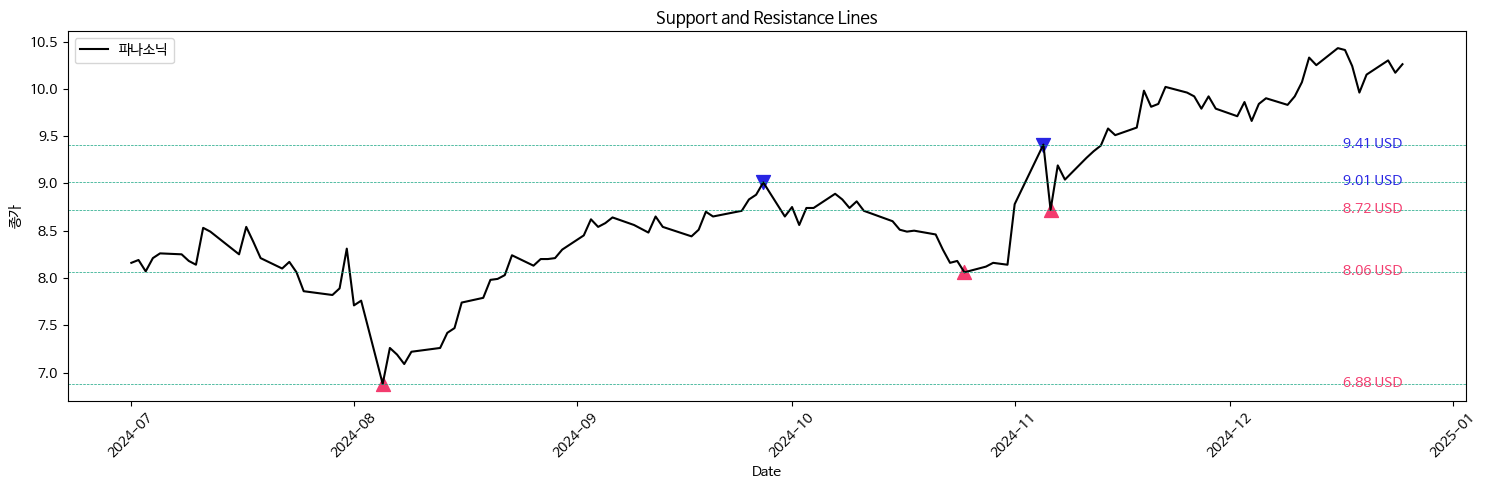

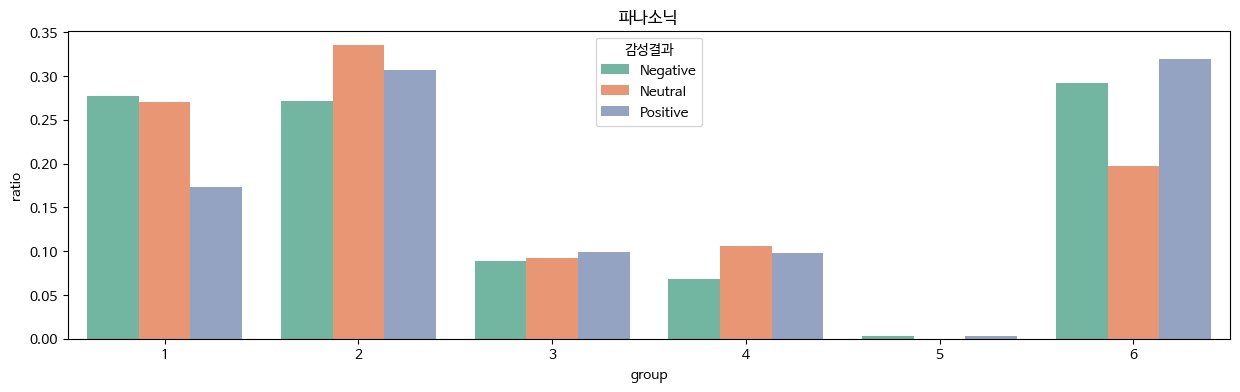

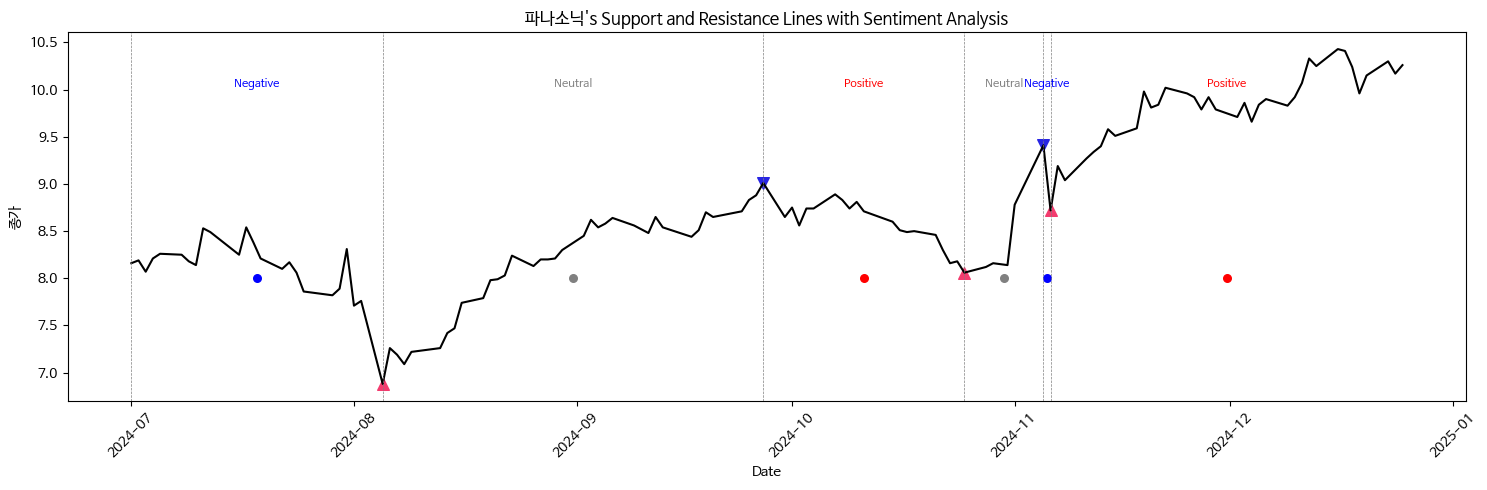

In [ ]:
a, b, c, d, e, f = senti_stock(panasonic_stock, panasonic_news,0.5)

In [ ]:
a

,Type,Price,Date
0,지지구간,8.16,2024-07-01
1,지지구간,6.88,2024-08-05
2,저항구간,9.01,2024-09-27
3,지지구간,8.06,2024-10-25
4,저항구간,9.41,2024-11-05
5,지지구간,8.72,2024-11-06


In [ ]:
b

,keyword,summary,date,감성점수,감성결과,group
0,2차전지,In Rankify's stock rechargeable battery secto...,2024-07-01,0.00,Neutral,1
1,2차전지,"※ We heard the opinion of Anna Lee, a researc...",2024-07-01,0.73,Positive,1
2,2차전지,Host: Hwa-seon Lee Anchor Appearance: Nam Ham ...,2024-07-01,0.32,Positive,1
3,2차전지,Secondary batteries and bio stocks are showin...,2024-07-01,0.67,Positive,1
4,2차전지,"Nanoteam (417010), a company specializing in ...",2024-07-01,-0.62,Negative,1
...,...,...,...,...,...,...
4504,2차전지,This 1st and 2nd training camp and dispatch o...,2024-12-25,0.40,Positive,6
4505,2차전지,"In addition, while in the past it was mainly ...",2024-12-25,-0.48,Negative,6
4506,2차전지,It is scheduled to expand to the entire regio...,2024-12-25,0.94,Positive,6
4507,2차전지,He was a hot potato in the winter transfer ma...,2024-12-25,0.48,Positive,6


In [ ]:
c

,group,감성결과,count
0,1,Negative,166
1,1,Neutral,59
2,1,Positive,639
3,2,Negative,163
4,2,Neutral,73
5,2,Positive,1134
6,3,Negative,53
7,3,Neutral,20
8,3,Positive,367
9,4,Negative,41


In [ ]:
d

,group,감성결과,count,ratio
0,1,Negative,166,0.276667
1,1,Neutral,59,0.270642
2,1,Positive,639,0.173124
3,2,Negative,163,0.271667
4,2,Neutral,73,0.334862
5,2,Positive,1134,0.307234
6,3,Negative,53,0.088333
7,3,Neutral,20,0.091743
8,3,Positive,367,0.099431
9,4,Negative,41,0.068333


In [ ]:
e

,group,감성결과,ratio
0,1,Negative,0.276667
1,2,Neutral,0.334862
2,3,Positive,0.099431
3,4,Neutral,0.105505
4,5,Negative,0.003333
5,6,Positive,0.318884


In [ ]:
f.groupby(['Type', '감성결과'])['감성결과'].value_counts()

Type  감성결과    
저항구간  Negative    1
      Positive    1
지지구간  Negative    1
      Neutral     2
      Positive    1
Name: count, dtype: int64